# Classify Images(CIFAR-10) using CNNs

# Problem Statement

* CIFAR-10 is a dataset that consists of several images 
divided into the following 10 classes:

> 0 - Airplanes
>
> 1 - Cars
>
> 2 - Birds
>
> 3 - Cats
>
> 4 - Deer
>
> 5 - Dogs
>
> 6 - Frogs
>
> 7 - Horses
>
> 8 - Ships
>
> 9 - Trucks

*   The dataset stands for the Canadian Institute For Advanced Research (CIFAR)

* CIFAR-10 is widely used for machine learning and computer vision applications.
* The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
* Images have low resolution (32x32).
Data Source: https://www.cs.toronto.edu/~kriz/cifar.html



# STEP 1: Import Libraries/Datasets

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [0]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step


# STEP 2: Visualize Data

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


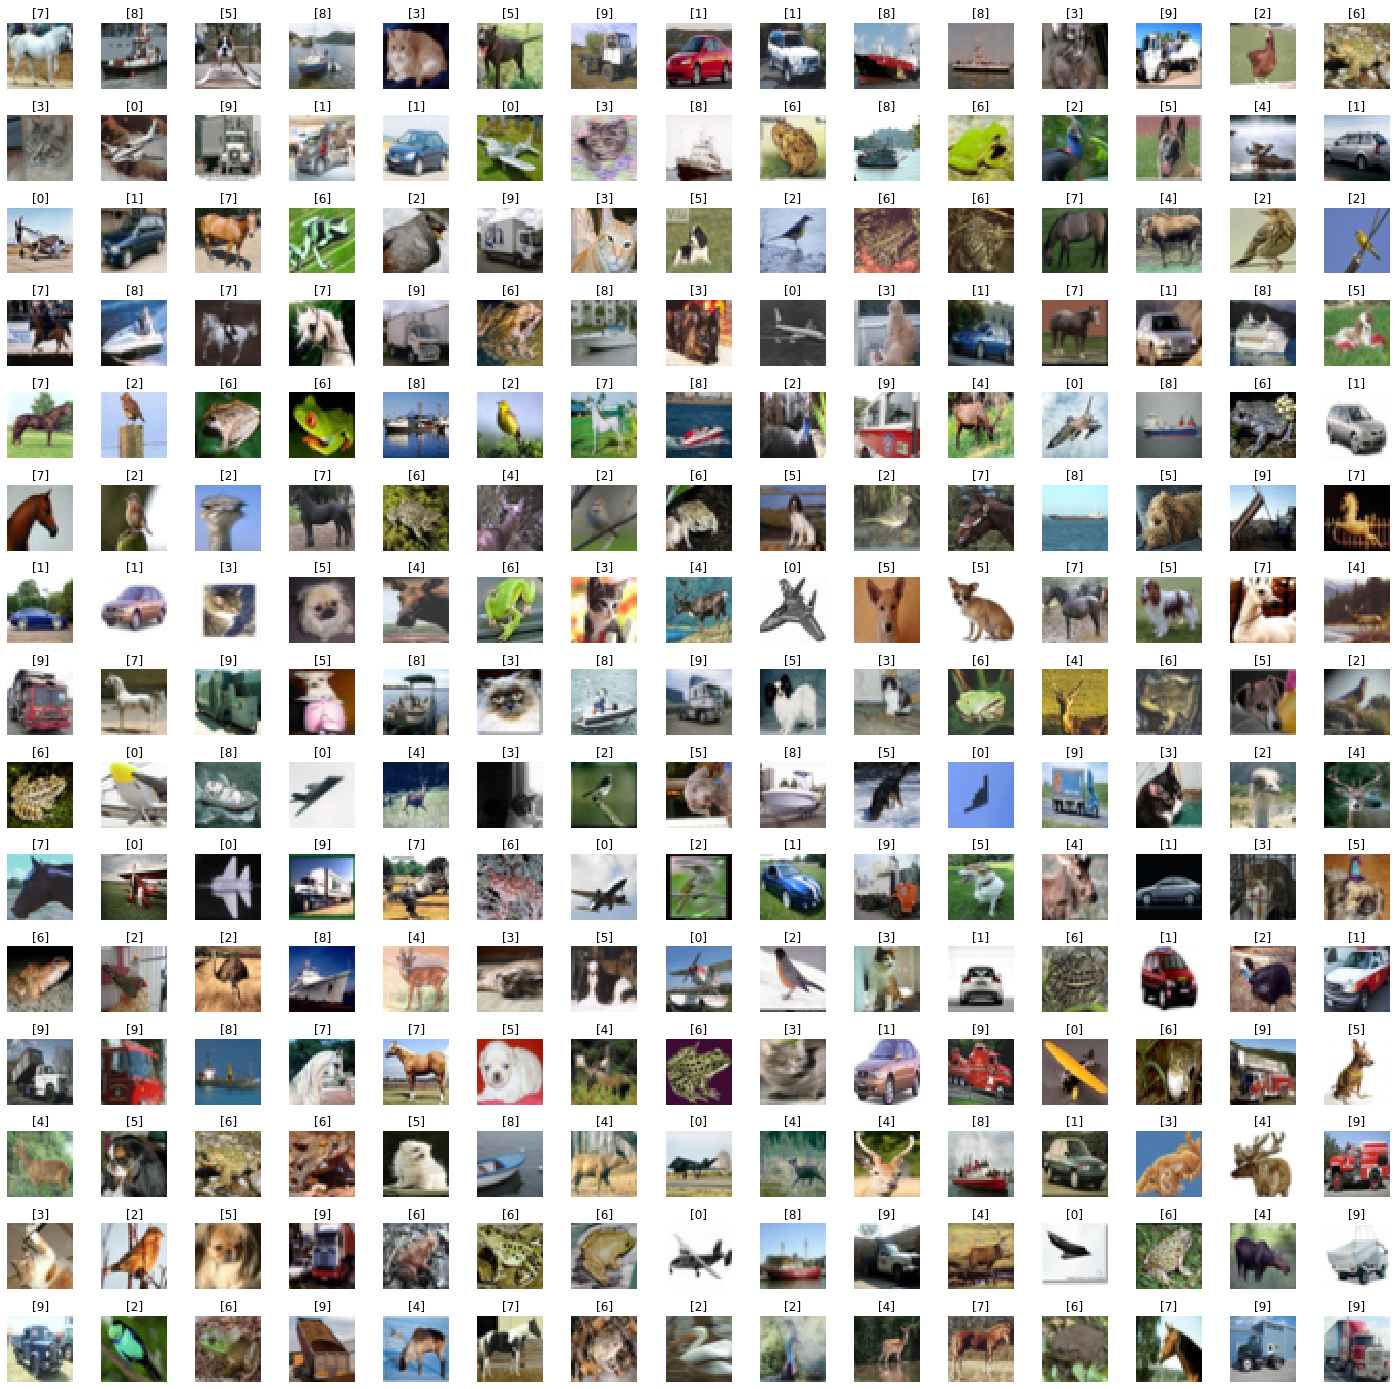

In [0]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

# STEP 3: Data Preparation

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
number_cat = 10

In [0]:
# Converting the y_train and y_test into categorical data
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [0]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [0]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [0]:
# Normalizing the X_train and X_test
X_train = X_train/255
X_test = X_test/255

In [0]:
# Fetch the input_shape for the CNN
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

# STEP 4: Train the model

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [0]:
# Training the CNN model

cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))
cnn_model.add(Dense(units = 1024, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'softmax'))  # As the output has only 10 categorical classes






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr = 0.001), metrics = ['accuracy'])

In [0]:
class_trainer = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/2





50000/50000 [==============================] - 535s 11ms/step - loss: 1.7345 - acc: 0.3831
Epoch 2/2
50000/50000 [==============================] - 536s 11ms/step - loss: 1.4557 - acc: 0.5002


# STEP 5: Evaluate the model

In [0]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 25s 3ms/step
Test Accuracy: 0.5443


In [0]:
pred_class = cnn_model.predict_classes(X_test)

In [0]:
# To get the y_test back to original form
y_test = y_test.argmax(1)

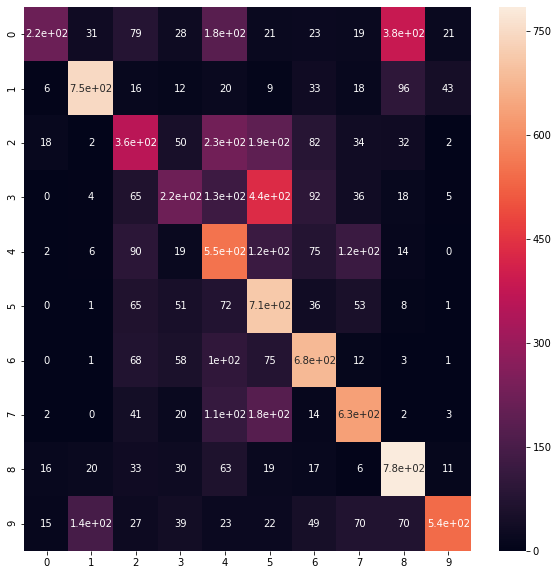

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, pred_class)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

# STEP 6: Save the model

In [0]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# STEP 7: Model Training with Augmented Dataset

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [0]:
datagen.fit(X_train)

In [0]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 563s 360ms/step - loss: 1.8554 - acc: 0.3342
Epoch 2/5
1563/1563 [==============================] - 558s 357ms/step - loss: 1.7751 - acc: 0.3616
Epoch 3/5
1563/1563 [==============================] - 557s 356ms/step - loss: 1.7521 - acc: 0.3771
Epoch 4/5
1563/1563 [==============================] - 560s 359ms/step - loss: 1.8343 - acc: 0.3671
Epoch 5/5
1563/1563 [==============================] - 563s 360ms/step - loss: 12.5938 - acc: 0.1431


In [0]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [0]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

10000/10000 [==============================] - 25s 3ms/step
Test accuracy 0.1005


In [0]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)